# Practical Introduction to imaging with python

In today's lecture:

1) Basic libraries for imaging, numpy & matplotlib

2) Operations on images 

3) Loading images, some common scenarios 

4) Convolution, edge detection and gradient magnitude

## Basics libraries, numpy and matplotlib

In [2]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt

In [88]:
# let's get a matrix of random numbers
a = np.random.rand(10,10)

In [89]:
#shape is everything
a.shape

(10, 10)

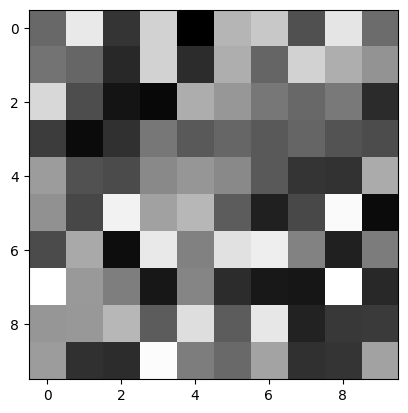

In [90]:
#let's plot the image with matplotlib
plt.imshow(a, cmap = "grey")

In [91]:
# what is the third dimension? 
b = np.random.rand(10,10,3)

In [ ]:
plt.imshow(b[::-1])

In [ ]:
#slicing the image
plt.imshow(b[:5,:5])

In [97]:
#numpy arrays are not immutable
for i in range(10):
    b[i,i] = 0

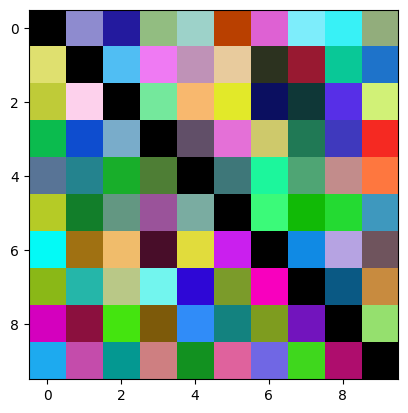

In [100]:
plt.imshow(b)

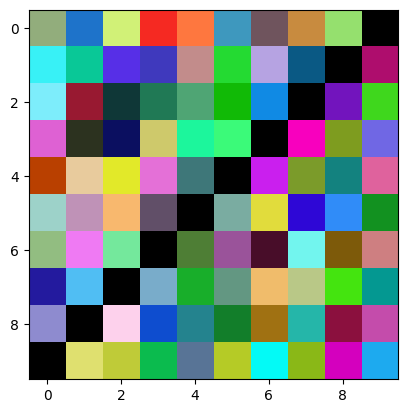

In [103]:
#we can also easily rotate the image
plt.imshow(np.rot90(b))
#flipping can be easily implemented acting on the dimensions, same for cropping

## Resizing images

In [108]:
#resizing require a form of interpolation, open-cv offers some practical functions
import cv2

In [119]:
#we can experiment with different interpolation techniques 
resized_b = cv2.resize(b,(64,64),interpolation=cv2.INTER_LINEAR)

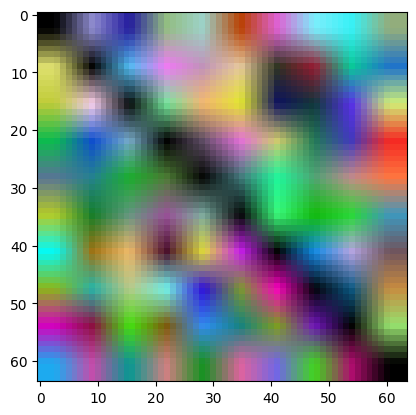

In [120]:
plt.imshow(resized_b)

## Plotting multiple images

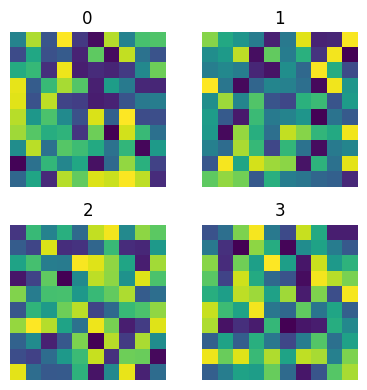

In [3]:
#matplotlib is not very intuitive
fig, axes = plt.subplots(2, 2, figsize=(4, 4))

for i,ax in enumerate(axes.flat):
    ax.imshow(np.random.rand(10,10))
    ax.set_title(str(i))
    ax.set_axis_off()

plt.tight_layout()
plt.show()

In [106]:
for i in axes.flat:
    print(i)

Axes(0.0659848,0.51875;0.387917x0.387917)
Axes(0.546098,0.51875;0.387917x0.387917)
Axes(0.0659848,0.0375;0.387917x0.387917)
Axes(0.546098,0.0375;0.387917x0.387917)


## Loading images, some ideas
loading images is a very common step when training a model, some of the most common situations are: 
- numpy arrays
- image folders (jpg,png)
- nc files and other structured data

#### Numpy arrays

In [ ]:
#let's create and save a numpy array "dataset"
np.save("test_npy",np.ones((100,64,64)))

In [60]:
!ls

letcture_1.ipynb  test_npy.npy


In [ ]:
# npy dataset can be easily loaded in memory with np.load
test = np.load("test_npy.npy")

In [62]:
test.shape

(100, 64, 64)

In [66]:
#np.load load everything in RAM, what if that is a concern? 
mmap_test = np.load("test_npy.npy", mmap_mode = "r")

In [68]:
# It's read at runtime from disk, and it's quite efficient 
test[1]

memmap([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]])

#### Image folders

In [140]:
#image folders are another very common way to store and move images, let's start with a single image
random_image = np.random.rand(32,32,3)
plt.imsave("color.png",random_image)

In [141]:
#we can use PIL to load the image 
from PIL import Image
image_png = Image.open("color.png")

In [142]:
# casting it into a numpy array
image_png = np.array(image_png)

In [143]:
#what?
image_png.shape

(32, 32, 4)

In [144]:
#what if I use jpg
plt.imsave("color.jpg",random_image)
image_jpg = Image.open("color.jpg")
image_jpg = np.array(image_jpg)
image_jpg.shape

(32, 32, 3)

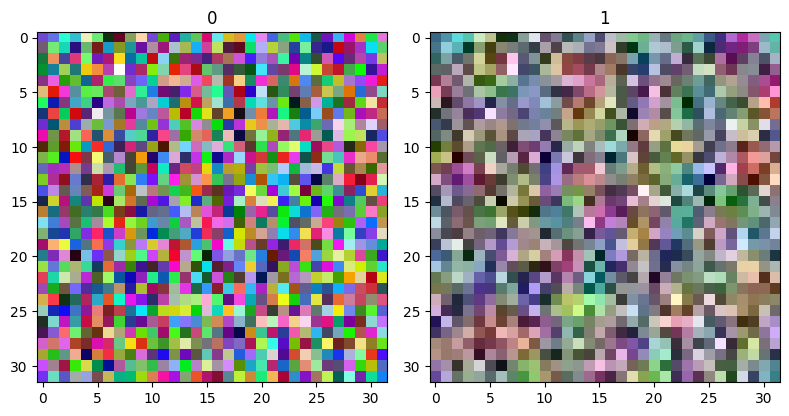

In [147]:
#let's take a look at the comparison 
#anche check the compression!
fig, axes = plt.subplots(1, 2, figsize=(8, 8))

images = [image_png,image_jpg]

for i,ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.set_title(str(i))

plt.tight_layout()
plt.show()

In [148]:
#let's make a dummy folder to test our code 
!mkdir pngFolder

mkdir: cannot create directory ‘pngFolder’: File exists


In [186]:
#save 100 images 
for i in range(100):
    image = np.random.rand(64,64)
    plt.imsave(f"./pngFolder/{i}.png",image)

In [187]:
import os
#and now let's read them back! 
#starting with the file names
png_files = [f for f in os.listdir("./pngFolder") if f.lower().endswith(".png")]


In [188]:
#this of course loads everything in ram, see if you can afford it 
images = []
for file in png_files:
    image_path = os.path.join("./pngFolder", file)
    image = Image.open(image_path)
    images.append(np.array(image))

In [189]:
#we can check the dimension
images = np.array(images)
images.shape

(100, 64, 64, 4)

### Loading an Netcdf4 file (or GRIB) 
common for metereology

Let's use the ERA5 reanalysis, the most widely used dataset

it can be downloaded easily (after registration) from here : https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels?tab=overview

In [ ]:
# nc files are structured datasets, similar to pandas DataFrames 
# to open one we need to install the xarray and  netCDF4 library 
!pip install xarray
!pip install netCDF4

In [153]:
#import the library
import xarray as xr

In [156]:
# dowload your nc file from copernicus!
dataset = xr.open_dataset("ERA5_wind_components.nc")
#let's take a look at what is contained in this file
dataset

<xarray.Dataset> Size: 598MB
Dimensions:     (valid_time: 72, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 576B 2025-02-16 ... 2025-02-18T23...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      (valid_time) <U4 1kB ...
Data variables:
    u10         (valid_time, latitude, longitude) float32 299MB ...
    v10         (valid_time, latitude, longitude) float32 299MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-24T11:37 GRIB to CDM+CF via cfgrib-0.9.1...

In [157]:
#we can slice the files we are interested in
dataset["u10"].isel(valid_time=range(1,11))

<xarray.DataArray 'u10' (valid_time: 10, latitude: 721, longitude: 1440)> Size: 42MB
[10382400 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 80B 2025-02-16T01:00:00 ... 2025-...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      (valid_time) <U4 160B ...
Attributes: (12/32)
    GRIB_paramId:                             165
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               m s**-1
    long_name:                                10 metre U wind component
    units:                                    m s**-1
    standard_name:                            unknown
    GRIB_surface:                             0.0

In [158]:
u10 = dataset["u10"].isel(valid_time=range(1,11)).values
v10 = dataset["v10"].isel(valid_time=range(1,11)).values

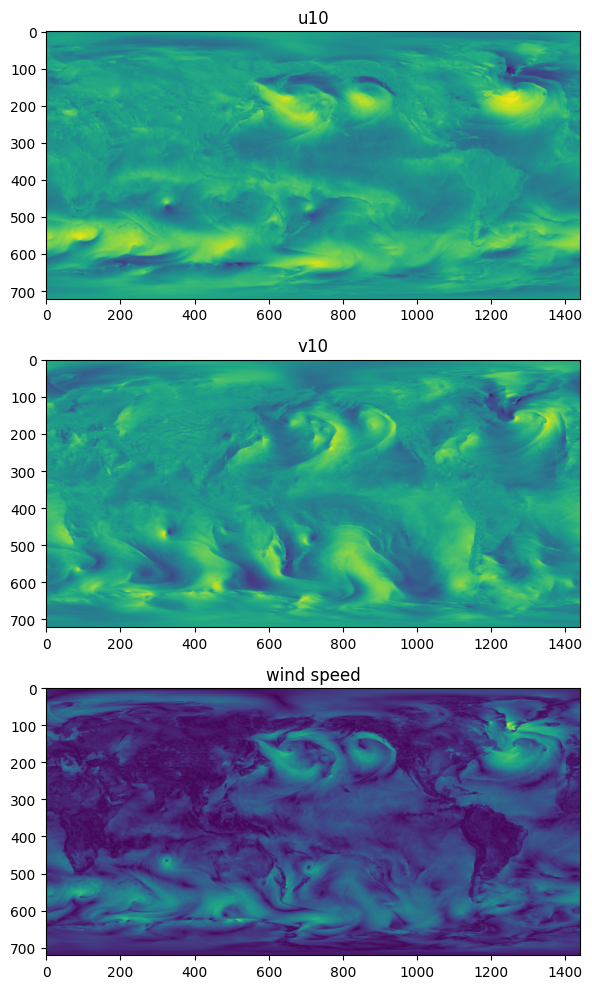

In [160]:
#let's see what we got 
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

images = [u10[0],v10[0], np.sqrt(u10[0]**2 + v10[0]**2)]
titles = ["u10", "v10", "wind speed"]

for i,ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.set_title(titles[i])

plt.tight_layout()
plt.show()
#could we make a gif?

beware, metereology dataset are usually very large, thus it's better to implement some kind of lazy loading, which xarray and netCDF4 support by default. Ideas on how to do it? 

## Image Convolution

Convolution in imaging, the basics: 

1) Convolution is the process of adding each element of the image to its local neighbors, weighted by a kernel.
2) For example, if we have two three-by-three matrices, the first a kernel, and the second an image piece, convolution is the process of flipping both the rows and columns of the kernel and multiplying locally similar entries and summing.

![a](https://wikimedia.org/api/rest_v1/media/math/render/svg/570600fdeed436d98626278f22bf034ff5ab5162)

Visualizing Convolution: 
https://ezyang.github.io/convolution-visualizer/
https://en.wikipedia.org/wiki/Kernel_(image_processing)#/media/File:2D_Convolution_Animation.gif

Basic properties of convolution: 1) Stride 2) Padding 3)Dilation

What is the size of the output? 
- if padding = 0 e stride = 1 the output has shape (Image_size - kernel_size + 1)
- if padding > 0 e stride > 1 the output has shape ([(Image_size - kernel_size + 2*padding) / stride ] + 1)

In [161]:
#Let's implement a simple basic convolve2d function 
def convolve2d(image, kernel):
    image_size = image.shape[0]
    kernel_size = kernel.shape[0]
    #compute the output shape to allocate result 
    output_shape = image_size - kernel_size + 1
    #allocate a matrix of zeros 
    output = np.zeros((output_shape,output_shape))
    #let's flip the kernel 
    kernel = np.flipud(np.fliplr(kernel))

    for i in range(output_shape):
        for j in range(output_shape):
            image_region = image[i:i+kernel_size,j:j+kernel_size]
            output[i,j] = np.sum(kernel * image_region)
            
    return output

In [39]:
test = np.random.rand(12,12)

#A few relevant filters for edge detection, based on the first order derivative
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

#and second order derivative
laplacian_kernel = np.array([[0, -1, 0],
                            [-1 , 4,-1],
                             [0, -1, 0]])

In [167]:
#Let's load an image
from PIL import Image
#if you are running this at home, just load any image you want by placing it in the samew folder as the notebook and chaning the name in the following line
image_petr = Image.open("petr.jpeg")
#what am I doing here?
image_petr = np.array(image_petr).mean(axis=2)

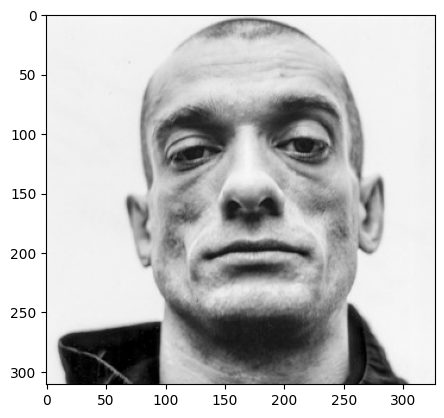

In [168]:
plt.imshow(image_petr, cmap = "grey")

In [170]:
#We can calculate the edge magnitude with the two sobel filters as follows: 
grad_x = convolve2d(image_petr,sobel_x)
grad_y = convolve2d(image_petr,sobel_y)

#gradient magnitude is the euclidean norm of the gradient vectors
gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)

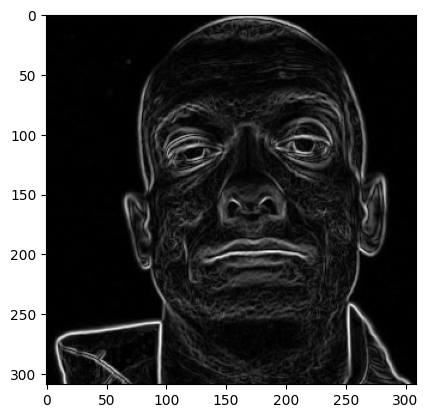

In [171]:
plt.imshow(gradient_magnitude, cmap = "grey")

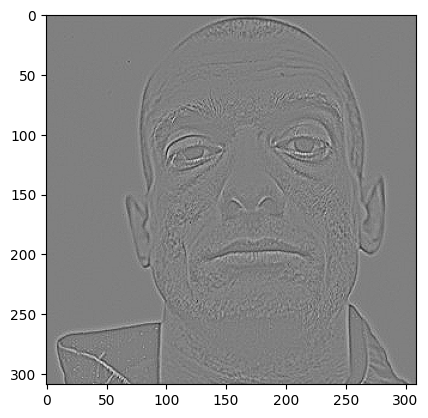

In [172]:
plt.imshow(convolve2d(image_petr,laplacian_kernel), cmap = "grey")

### In practice...

In [174]:
#scipy has a very practical and efficient convolve function
import scipy.ndimage
# mode is padding 
laplacian_petr = scipy.ndimage.convolve(image_petr,sobel_x,mode="reflect")

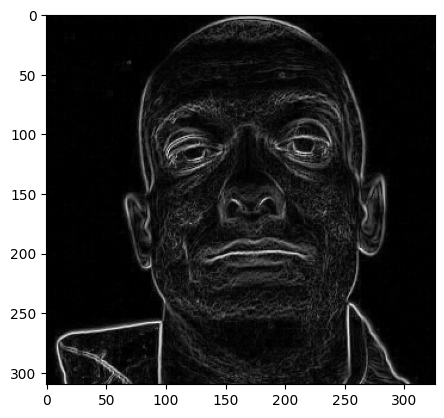

In [175]:
#Calculate magnitude via np.diff, more efficient than convolution 
grad_x = np.diff(image_petr,axis = 0)[:,:-1]
grad_y = np.diff(image_petr,axis = 1)[:-1,:]
gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
plt.imshow(gradient_magnitude, cmap = "grey")

In [176]:
# why is diff more efficient? 
# the results are slightly different, right? 

In [ ]:
#let's use convolution to plur the image with a gaussian kernel
gaussian = np.array([[1, 2, 1],
                    [2, 4, 2],
                    [1, 2, 1]])

In [182]:
#we directly blur the gradient magnitude
blurred_magnitude = scipy.ndimage.convolve(gradient_magnitude,gaussian,mode="reflect")

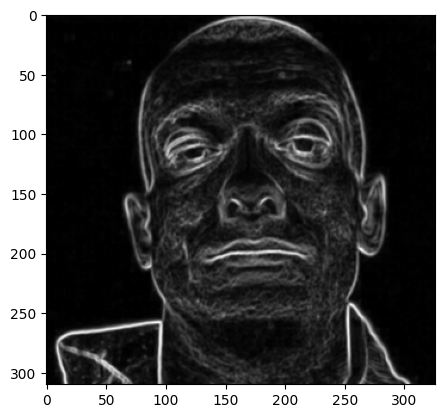

In [183]:
plt.imshow(blurred_magnitude, cmap = "grey")

In [184]:
#goodbye, thanks for following :) 